In [40]:
import requests 
import pandas as pd 
import numpy as np 
from geopy.geocoders import Nominatim 
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import folium 
import random
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


In [41]:
CLIENT_ID = 'FAINNZ41NDQMXJSG5RPBEVL0GDDEKHE1C4DS21OKL50ASCJ3' # your Foursquare ID
CLIENT_SECRET = 'E11QNNGFGPXUDWMV5L30QV0NAYZNOQPX5CZZ2CGF23MVK2KT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FAINNZ41NDQMXJSG5RPBEVL0GDDEKHE1C4DS21OKL50ASCJ3
CLIENT_SECRET:E11QNNGFGPXUDWMV5L30QV0NAYZNOQPX5CZZ2CGF23MVK2KT


In [42]:
spb = 'St. Petersburg, Russia'
toronto = 'Toronto'
berlin = 'Berlin, Germany'
par = 'Paris, France'

geolocator = Nominatim(user_agent="foursquare_agent")
spb_location = geolocator.geocode(spb)
tor_location = geolocator.geocode(toronto)
spb_latitude = spb_location.latitude
spb_longitude = spb_location.longitude
tor_latitude = tor_location.latitude
tor_longitude = tor_location.longitude
spb_loc = [spb_latitude, spb_longitude]
tor_loc = [tor_latitude, tor_longitude]
ber_location = geolocator.geocode(berlin)
par_location = geolocator.geocode(par)
ber_latitude = ber_location.latitude
ber_longitude = ber_location.longitude
par_latitude = par_location.latitude
par_longitude = par_location.longitude
ber_loc = [ber_latitude, ber_longitude]
par_loc = [par_latitude, par_longitude]
print(spb_loc, tor_loc, ber_loc, par_loc)

[59.938732, 30.316229] [43.653963, -79.387207] [52.5170365, 13.3888599] [48.8566101, 2.3514992]


In [43]:
search_query = 'restaurant'
radius = 2000

In [44]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, spb_latitude, spb_longitude, VERSION, search_query, radius, LIMIT)
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, tor_latitude, tor_longitude, VERSION, search_query, radius, LIMIT)
url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ber_latitude, ber_longitude, VERSION, search_query, radius, LIMIT)
url4 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, par_latitude, par_longitude, VERSION, search_query, radius, LIMIT)


In [45]:
spb_results = requests.get(url1).json()
tor_results = requests.get(url2).json()
ber_results = requests.get(url3).json()
par_results = requests.get(url4).json()

In [46]:
spb_venues = spb_results['response']['venues']
sdataframe = json_normalize(spb_venues)

tor_venues = tor_results['response']['venues']
tdataframe = json_normalize(tor_venues)

ber_venues = ber_results['response']['venues']
bdataframe = json_normalize(ber_venues)

par_venues = par_results['response']['venues']
pdataframe = json_normalize(par_venues)


In [47]:
bdataframe.shape

(50, 19)

In [48]:
sfiltered_columns = ['name', 'categories'] + [col for col in sdataframe.columns if col.startswith('location.')] + ['id']
sdataframe_filtered = sdataframe.loc[:, sfiltered_columns]
tfiltered_columns = ['name', 'categories'] + [col for col in tdataframe.columns if col.startswith('location.')] + ['id']
tdataframe_filtered = tdataframe.loc[:, tfiltered_columns]
bfiltered_columns = ['name', 'categories'] + [col for col in bdataframe.columns if col.startswith('location.')] + ['id']
bdataframe_filtered = bdataframe.loc[:, bfiltered_columns]
pfiltered_columns = ['name', 'categories'] + [col for col in pdataframe.columns if col.startswith('location.')] + ['id']
pdataframe_filtered = pdataframe.loc[:, pfiltered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

sdataframe_filtered['categories'] = sdataframe_filtered.apply(get_category_type, axis=1)
tdataframe_filtered['categories'] = tdataframe_filtered.apply(get_category_type, axis=1)
bdataframe_filtered['categories'] = bdataframe_filtered.apply(get_category_type, axis=1)
pdataframe_filtered['categories'] = pdataframe_filtered.apply(get_category_type, axis=1)

sdataframe_filtered.columns = [column.split('.')[-1] for column in sdataframe_filtered.columns]
tdataframe_filtered.columns = [column.split('.')[-1] for column in tdataframe_filtered.columns]
bdataframe_filtered.columns = [column.split('.')[-1] for column in bdataframe_filtered.columns]
pdataframe_filtered.columns = [column.split('.')[-1] for column in pdataframe_filtered.columns]

In [61]:
sdataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Pushka Inn Hotel & Restaurant,Hotel,"наб. р. Мойки, 14",RU,Санкт-Петербург,Россия,NaN,343,"[наб. р. Мойки, 14, 191186, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.94105484799516...",59.941055,30.320292,NaN,191186,Санкт-Петербург,4f4e4a32e4b00b42c5349155
1,Ресторан «Европа» / L'Europe Restaurant,Restaurant,Гранд Отель Европа,RU,Санкт-Петербург,Россия,"Михайловская ул., 1/7",874,"[Гранд Отель Европа (Михайловская ул., 1/7), С...","[{'label': 'display', 'lat': 59.93563371995286...",59.935634,30.330637,NaN,NaN,Санкт-Петербург,4dee28e352b13dda25f0fe54
2,Taleon Restaurant (Ресторан «Талион»),Restaurant,"наб. р. Мойки, 59",RU,Санкт-Петербург,Россия,NaN,338,"[наб. р. Мойки, 59, Санкт-Петербург, Россия]","[{'label': 'display', 'lat': 59.93592450636164...",59.935925,30.318571,NaN,NaN,Санкт-Петербург,4ed79d8d6da14054c2e91853
3,Restaurant. Hotel Ambassador,Restaurant,Ambassador Hotel,RU,Санкт-Петербург,Россия,"просп. Римского-Корсакова, 5-7",1556,"[Ambassador Hotel (просп. Римского-Корсакова, ...","[{'label': 'display', 'lat': 59.92505696384225...",59.925057,30.310429,NaN,190068,Санкт-Петербург,4bb58bcd1344b71330769c04
4,Davidov Restaurant,Eastern European Restaurant,"ул. Большая Морская, 39",RU,Санкт-Петербург,Россия,NaN,765,"[ул. Большая Морская, 39, Санкт-Петербург, Рос...","[{'label': 'display', 'lat': 59.93295440451822...",59.932954,30.308798,NaN,NaN,Санкт-Петербург,4f5f2ab5e4b00373714984b8


In [62]:
spb_map = folium.Map(spb_loc, zoom_start=13) 
tor_map = folium.Map(tor_loc, zoom_start=13)
ber_map = folium.Map(ber_loc, zoom_start=13) 
par_map = folium.Map(par_loc, zoom_start=13)

In [63]:
folium.features.CircleMarker(
    spb_loc,
    radius=10,
    color='red',
    popup='SPb center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(spb_map)

for lat, lng, label in zip(sdataframe_filtered.lat, sdataframe_filtered.lng, sdataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(spb_map)


In [64]:
spb_map

In [65]:
folium.features.CircleMarker(
    tor_loc,
    radius=10,
    color='red',
    popup='Toronto center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(tor_map)

for lat, lng, label in zip(tdataframe_filtered.lat, tdataframe_filtered.lng, tdataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(tor_map)

In [66]:
tor_map

In [67]:
folium.features.CircleMarker(
    ber_loc,
    radius=10,
    color='red',
    popup='Berlin center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(ber_map)

for lat, lng, label in zip(bdataframe_filtered.lat, bdataframe_filtered.lng, bdataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ber_map)


In [68]:
ber_map

In [69]:
folium.features.CircleMarker(
    par_loc,
    radius=10,
    color='red',
    popup='LA center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(par_map)

for lat, lng, label in zip(pdataframe_filtered.lat, pdataframe_filtered.lng, pdataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(par_map)


In [70]:
par_map

In [80]:
sdf = sdataframe_filtered.loc[:, ['categories','city', 'name', 'lat', 'lng']]
tdf = tdataframe_filtered.loc[:, ['categories','city', 'name', 'lat', 'lng']]
bdf = bdataframe_filtered.loc[:, ['categories','city', 'name', 'lat', 'lng']]
pdf = pdataframe_filtered.loc[:, ['categories','city', 'name', 'lat', 'lng']]

In [81]:
sdf.head()

,categories,city,name,lat,lng
0,Hotel,Санкт-Петербург,Pushka Inn Hotel & Restaurant,59.941055,30.320292
1,Restaurant,Санкт-Петербург,Ресторан «Европа» / L'Europe Restaurant,59.935634,30.330637
2,Restaurant,Санкт-Петербург,Taleon Restaurant (Ресторан «Талион»),59.935925,30.318571
3,Restaurant,Санкт-Петербург,Restaurant. Hotel Ambassador,59.925057,30.310429
4,Eastern European Restaurant,Санкт-Петербург,Davidov Restaurant,59.932954,30.308798


In [82]:
sdf.city = sdf.city.str.replace('Санкт-Петербург', 'St. Petersburg')
sdf.city = sdf.city.str.replace('Санкт-Петебург', 'St. Petersburg')
tdf.city = tdf.city.replace(np.nan, 'Toronto')
sdf.city = sdf.city.replace(np.nan, 'St. Petersburg')
bdf.city = bdf.city.replace(np.nan, 'Berlin')
pdf.city = pdf.city.replace(np.nan, 'Paris')

In [83]:
pdf.categories = pdf.categories.replace(['Szechuan Restaurant', 'Japanese Restaurant', 'Korean Restaurant'], 'Asian Restaurant')
pdf.categories = pdf.categories.replace(['Bistro', 'Sandwich Place'], 'Fast Food Restaurant')

In [84]:
bdf.categories = bdf.categories.replace(['Chinese Restaurant', 'Japanese Restaurant'], 'Asian Restaurant')
tdf.categories = tdf.categories.replace(['Dim Sum Restaurant', 'Chinese Restaurant', 'Korean Restaurant', 'Sushi Restaurant', 'Noodle House'], 'Asian Restaurant')
tdf.categories = tdf.categories.replace('Deli / Bodega', 'Indian Restaurant')
tdf.categories = tdf.categories.replace('New American Restaurant', 'American Restaurant')

In [85]:
tdf.head(50)

,categories,city,name,lat,lng
0,American Restaurant,Toronto,Hemispheres Restaurant & Bistro,43.654884,-79.385931
1,Asian Restaurant,Toronto,Rol San Restaurant 龍笙棧,43.654318,-79.398650
2,Asian Restaurant,Toronto,Goldstone Noodle Restaurant 金石,43.652278,-79.398039
3,Restaurant,Toronto,Victoria's Restaurant,43.649298,-79.376431
4,Wine Bar,Toronto,360 Restaurant,43.642537,-79.387042
5,Asian Restaurant,Toronto,Sky Dragon Chinese Restaurant 龍翔酒樓,43.652783,-79.398174
6,Asian Restaurant,Toronto,Swatow Restaurant 汕頭小食家,43.653866,-79.398334
7,Restaurant,Toronto,Azure Restaurant & Bar,43.644749,-79.385113
8,Asian Restaurant,Toronto,North-East Chinese Restaurant 華北美食,43.653185,-79.396677
9,Asian Restaurant,Toronto,Hong Shing Chinese Restaurant,43.654925,-79.387089


In [ ]:
tdf.categories[5, 7] = 'Hotel Restaurant'
tdf.categories[12] = 'French Restaurant'
tdf.categories[14] = 'Night Club'
tdf.categories[18] = 'European Restaurant'
tdf.categories[19, 28] = 'Canadian Restaurant'
tdf.categories[49] = 'Middle Eastern Restaurant'
tdf.categories[39, 45, 46, 48] = 'Asian Restaurant'
tdf.categories[32] = 'American Restaurant'

In [ ]:
sdf.categories[1, 2, 7] = 'European Restaurant'
sdf.categories[4, 17] = 'Hotel Restaurant'
sdf.categories[13, 41] = 'Russian Restaurant'
sdf.categories[24] = 'Caucasian Restaurant'

In [ ]:
sdf.categories[0, 6, 30] = 'Hotel Restaurant'
sdf.categories[49] = 'Russian Restaurant'
pdf.categories[19, 47] = 'Asian Restaurant'

In [ ]:
bdf.categories[5, 14] = 'Hotel Restaurant'
bdf.categories[9] = 'German Restaurant'
bdf.categories[15] = 'Bar'
bdf.categories[16] = 'European Restaurant'
bdf.categories[26] = 'French Restaurant'

In [90]:
sdf1 = sdf.loc[:, ['categories', 'city']]
tdf1 = tdf.loc[:, ['categories', 'city']]
bdf1 = bdf.loc[:, ['categories', 'city']]
pdf1 = pdf.loc[:, ['categories', 'city']]

In [91]:
comdf = pd.concat([sdf1, tdf1, bdf1, pdf1]).reset_index()

In [92]:
comdf = comdf.drop('index', axis = 1)

In [93]:
comdf_onehot = pd.get_dummies(comdf[['categories']], prefix="", prefix_sep="")
comdf_onehot['City'] = comdf['city'] 
fixed_columns = [comdf_onehot.columns[-1]] + list(comdf_onehot.columns[:-1])
comdf_onehot = comdf_onehot[fixed_columns]


In [95]:
comdf_onehot.shape

(200, 50)

In [96]:
comdf_grouped = comdf_onehot.groupby('City').mean().reset_index()

In [97]:
comdf_grouped

,City,American Restaurant,Arepa Restaurant,Asian Restaurant,Bar,Bistro,Breakfast Spot,Cafeteria,Café,Canadian Restaurant,...,Other Event,Pub,Restaurant,Russian Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,Berlin,0.00,0.00,0.04,0.02,0.02,0.08,0.00,0.02,0.00,...,0.00,0.00,0.30,0.00,0.02,0.00,0.02,0.02,0.04,0.00
1,Paris,0.00,0.02,0.14,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.00,0.10,0.00,0.02,0.00,0.04,0.00,0.02,0.00
2,St. Petersburg,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.00,...,0.02,0.02,0.10,0.14,0.00,0.02,0.00,0.02,0.00,0.00
3,Toronto,0.14,0.00,0.32,0.02,0.00,0.04,0.00,0.00,0.04,...,0.00,0.00,0.14,0.00,0.02,0.00,0.00,0.00,0.04,0.02


In [98]:
def return_most_common_rest(row, num_top_rest):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_rest]

In [99]:
num_top_rest = 10

indicators = ['st', 'nd', 'rd']

columns = ['City']
for ind in np.arange(num_top_rest):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

comdf_rest_sorted = pd.DataFrame(columns=columns)
comdf_rest_sorted['City'] = comdf_grouped['City']

for ind in np.arange(comdf_grouped.shape[0]):
    comdf_rest_sorted.iloc[ind, 1:] = return_most_common_rest(comdf_grouped.iloc[ind, :], num_top_rest)

In [100]:
comdf_rest_sorted

,City,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Berlin,Restaurant,German Restaurant,French Restaurant,Breakfast Spot,Vietnamese Restaurant,Hotel Restaurant,Asian Restaurant,Café,Hotel Bar,Italian Restaurant
1,Paris,French Restaurant,Asian Restaurant,Restaurant,College Cafeteria,Fast Food Restaurant,Turkish Restaurant,Middle Eastern Restaurant,Italian Restaurant,Lebanese Restaurant,Food Court
2,St. Petersburg,Russian Restaurant,Restaurant,Modern European Restaurant,Hotel Restaurant,Eastern European Restaurant,European Restaurant,Caucasian Restaurant,Café,Indian Restaurant,Italian Restaurant
3,Toronto,Asian Restaurant,American Restaurant,Restaurant,Indian Restaurant,Breakfast Spot,Canadian Restaurant,Vietnamese Restaurant,Hotel Restaurant,Bar,Caribbean Restaurant


<function matplotlib.pyplot.show(*args, **kw)>

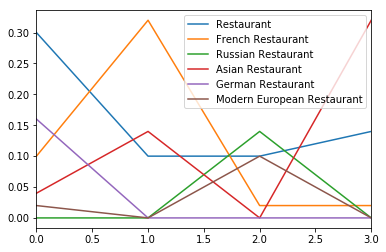

In [102]:
comdf_grouped.loc[:, ['Restaurant', 'French Restaurant', 'Russian Restaurant', 'Asian Restaurant', 'German Restaurant', 'Modern European Restaurant']].plot()
plt.show

In [198]:
a = len(comdf.categories)
b = comdf.categories.loc[comdf.categories != 'Restaurant'].value_counts('%')
c = len(comdf.categories.unique())
print('Total number of restaurants is ' + str(a) + '.')
print('Total number of restaurant types is ' + str(c) + '.')
print()
print('Most common type of restaurant in Berlin is a ' + str(comdf_rest_sorted['1st Most Common Restaurant'][0]) + '.')
print('Most common type of restaurant in Paris is a '  + str(comdf_rest_sorted['1st Most Common Restaurant'][1]) + '.')
print('Most common type of restaurant in St. Petersburg is a ' + str(comdf_rest_sorted['1st Most Common Restaurant'][2]) + '.')
print('Most common type of restaurant in Toronto is an ' + str(comdf_rest_sorted['1st Most Common Restaurant'][3]) + '.')
print()
print('List of restaurant types by persantage (except Restaurant): \n\n' + str(b))

Total number of restaurants is 200.
Total number of restaurant types is 50.

Most common type of restaurant in Berlin is a Restaurant.
Most common type of restaurant in Paris is a French Restaurant.
Most common type of restaurant in St. Petersburg is a Russian Restaurant.
Most common type of restaurant in Toronto is an Asian Restaurant.

List of restaurant types by persantage (except Restaurant): 

Asian Restaurant                 0.149701
French Restaurant                0.137725
Hotel Restaurant                 0.053892
German Restaurant                0.047904
American Restaurant              0.041916
Russian Restaurant               0.041916
Breakfast Spot                   0.035928
Modern European Restaurant       0.035928
Vietnamese Restaurant            0.029940
European Restaurant              0.029940
Indian Restaurant                0.029940
Middle Eastern Restaurant        0.023952
Italian Restaurant               0.023952
Turkish Restaurant               0.017964
Caucasian 